# Notebook For Training Character Recognition

### Datasets :
#### 1. Digits (0-9) : MNIST (28 * 28)
#### 2. Symbols ( ‘(’ , ‘)’, ‘-’, ‘+’, ‘*’ ): Kaggle Handwritten Mathematical Symbols Dataset (45 * 45)

### Preprocessing of symbols to match MNIST digits :
Converted to Binary 

Padded to 20 * 20 (preserving the aspect ratio)

Padded to 28 * 28 using Centre of mass

![image.png](attachment:image.png)

In [ ]:
import tensorflow as tf

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import keras
import math
from scipy import ndimage

### Data : Collecting images

 # Model

In [ ]:
import keras
keras.backend.set_image_data_format('channels_first')

# Bnagla Dataset Load

In [ ]:
from __future__ import print_function

In [ ]:
# Importing necessary libraries
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation,Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#Declaring constants
FIG_WIDTH=20 # Width of figure
HEIGHT_PER_ROW=3 # Height of each row when showing a figure which consists of multiple rows
RESIZE_DIM=28 # The images will be resized to 28x28 pixels

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/u/0/uc?id=1uH6F6eGDoc47YxU2tqBsXc32gGxnenGr&export=download' -O image.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/softprojectimageset/archive.zip 

In [ ]:
SOURCE_FILES = os.path.join('NumtaDB_with_aug')

In [ ]:
if not os.path.exists(SOURCE_FILES):
    !mkdir -p {SOURCE_FILES}
    !mkdir -p {CHECKPOINT_PATH}
    # wget is a library to retrieve files through HTTP from the internet.
    !wget -O src.rar https://www.dropbox.com/s/7rdx9l78cufkt6c/archive.rar?dl=0#:~:text=Sign%20up-,Direct,-download
    !mv src.rar {SOURCE_FILES}
    %cd {SOURCE_FILES}
    !unrar x src.rar
    !rm src.rar

In [ ]:
%cd NumtaDB_with_aug
!pwd

/content/NumtaDB_with_aug
/content/NumtaDB_with_aug


In [ ]:
data_dir=os.path.join('archive')
paths_train_a=glob.glob(os.path.join(data_dir,'training-a','*.png'))
paths_train_b=glob.glob(os.path.join(data_dir,'training-b','*.png'))
paths_train_e=glob.glob(os.path.join(data_dir,'training-e','*.png'))
paths_train_c=glob.glob(os.path.join(data_dir,'training-c','*.png'))
paths_train_d=glob.glob(os.path.join(data_dir,'training-d','*.png'))

paths_train_fb = glob.glob(os.path.join(data_dir,'(','*.png'))
paths_train_fbc = glob.glob(os.path.join(data_dir,')','*.png'))
paths_train_p = glob.glob(os.path.join(data_dir,'+','*.png'))
paths_train_m = glob.glob(os.path.join(data_dir,'-','*.png'))
paths_train_eq = glob.glob(os.path.join(data_dir,'=','*.png'))
paths_train_tb = glob.glob(os.path.join(data_dir,'[','*.png'))
paths_train_tbc = glob.glob(os.path.join(data_dir,']','*.png'))
paths_train_sb = glob.glob(os.path.join(data_dir,'{','*.png'))
paths_train_sbc = glob.glob(os.path.join(data_dir,'}','*.png'))
paths_train_mp = glob.glob(os.path.join(data_dir,'times','*.png'))
paths_train_mp2 = glob.glob(os.path.join(data_dir,'mul','*.png'))

paths_train_0 = glob.glob(os.path.join(data_dir,'0','*.png'))
paths_train_1 = glob.glob(os.path.join(data_dir,'1','*.png'))
paths_train_2 = glob.glob(os.path.join(data_dir,'2','*.png'))
paths_train_3 = glob.glob(os.path.join(data_dir,'3','*.png'))
paths_train_4 = glob.glob(os.path.join(data_dir,'4','*.png'))
#paths_train_5 = glob.glob(os.path.join(data_dir,'5','*.png'))
#paths_train_6 = glob.glob(os.path.join(data_dir,'6','*.png'))
paths_train_7 = glob.glob(os.path.join(data_dir,'7','*.png'))
paths_train_8 = glob.glob(os.path.join(data_dir,'8','*.png'))
paths_train_9 = glob.glob(os.path.join(data_dir,'9','*.png'))
paths_train_add = glob.glob(os.path.join(data_dir,'add','*.png'))
paths_train_eql = glob.glob(os.path.join(data_dir,'eq','*.png'))
paths_train_sub = glob.glob(os.path.join(data_dir,'sub','*.png'))
paths_train_all=paths_train_a+paths_train_b+paths_train_c+paths_train_d+paths_train_e+paths_train_fb+paths_train_fbc+paths_train_p+paths_train_m+paths_train_eq+paths_train_tb+paths_train_tbc+paths_train_sb+paths_train_sbc+paths_train_mp+paths_train_mp2+paths_train_0+paths_train_1+paths_train_2+paths_train_3+paths_train_4+paths_train_7+paths_train_8+paths_train_9+paths_train_add+paths_train_eql+paths_train_sub

paths_test_a=glob.glob(os.path.join(data_dir,'testing-a','*.png'))
paths_test_b=glob.glob(os.path.join(data_dir,'testing-b','*.png'))
paths_test_e=glob.glob(os.path.join(data_dir,'testing-e','*.png'))
paths_test_c=glob.glob(os.path.join(data_dir,'testing-c','*.png'))
paths_test_d=glob.glob(os.path.join(data_dir,'testing-d','*.png'))
paths_test_f=glob.glob(os.path.join(data_dir,'testing-f','*.png'))+glob.glob(os.path.join(data_dir,'testing-f','*.JPG'))
paths_test_auga=glob.glob(os.path.join(data_dir,'testing-auga','*.png'))
paths_test_augc=glob.glob(os.path.join(data_dir,'testing-augc','*.png'))
paths_test_all=paths_test_a+paths_test_b+paths_test_c+paths_test_d+paths_test_e+paths_test_f+paths_test_auga+paths_test_augc

path_label_train_a=os.path.join(data_dir,'training-a.csv')
path_label_train_b=os.path.join(data_dir,'training-b.csv')
path_label_train_e=os.path.join(data_dir,'training-e.csv')
path_label_train_c=os.path.join(data_dir,'training-c.csv')
path_label_train_d=os.path.join(data_dir,'training-d.csv')

path_label_train_fb=os.path.join(data_dir,'training-(.csv')
path_label_train_fbc=os.path.join(data_dir,'training-).csv')
path_label_train_p=os.path.join(data_dir,'training-+.csv')
path_label_train_m=os.path.join(data_dir,'training--.csv')
path_label_train_eq=os.path.join(data_dir,'training-=.csv')
path_label_train_tb=os.path.join(data_dir,'training-[.csv')
path_label_train_tbc=os.path.join(data_dir,'training-].csv')
path_label_train_mp=os.path.join(data_dir,'training-_.csv')
path_label_train_mp2=os.path.join(data_dir,'training-mul.csv')
path_label_train_sb = os.path.join(data_dir,'training-{.csv')
path_label_train_sbc = os.path.join(data_dir,'training-}.csv')

path_label_train_0=os.path.join(data_dir,'0.csv')
path_label_train_1=os.path.join(data_dir,'1.csv')
path_label_train_2=os.path.join(data_dir,'2.csv')
path_label_train_3=os.path.join(data_dir,'3.csv')
path_label_train_4=os.path.join(data_dir,'4.csv')
#path_label_train_5=os.path.join(data_dir,'5.csv')
#path_label_train_6=os.path.join(data_dir,'6.csv')
path_label_train_7=os.path.join(data_dir,'7.csv')
path_label_train_8=os.path.join(data_dir,'8.csv')
path_label_train_9=os.path.join(data_dir,'9.csv')
path_label_train_add=os.path.join(data_dir,'add.csv')
path_label_train_eql=os.path.join(data_dir,'eq.csv')
path_label_train_sub=os.path.join(data_dir,'sub.csv')













#Creating DataFrame for +,-,.....


In [ ]:
filenameList=[]
digitList=[]
symbolList=[]
from PIL import Image
images = glob.glob("Ekushey_dataset/Newfolder/eq_png/*.png")
for image in images:
    with open(image, 'rb') as file:
        img = Image.open(file)
        print(str(os.path.basename(str(file))).replace("'>",''))
        name = str(os.path.basename(str(file))).replace("'>",'')
        filenameList.append(name)
        digitList.append(19)
        symbolList.append("=")
       

In [ ]:
df = pd.DataFrame(dict(filename=filenameList,digit=digitList,symbol=symbolList))
df.to_csv("/content/eq.csv")

# JPG to PNG


In [ ]:
from PIL import Image

images = glob.glob("Ekushey_dataset/Newfolder/sub/*.jpg")
for image in images:
    with open(image, 'rb') as file:
        img = Image.open(file)
        print(str(os.path.basename(str(file))).replace(".jpg'>",''))
        name = str(os.path.basename(str(file))).replace(".jpg'>",'')
        img.save(f"Ekushey_dataset/Newfolder/sub_png/{name}.png")

In [ ]:
!zip -r /content/file-csv.zip archive/csvfiles

# Converting 24-bit to 8 bit

In [ ]:
from PIL import Image

images = glob.glob("Ekushey_dataset/Newfolder/sub_png/*.png")
for image in images:
    with open(image, 'rb') as file:
        img = Image.open(file)
        print(str(os.path.basename(str(file))).replace("'>",''))
        name = str(os.path.basename(str(file))).replace("'>",'')
        img=img.quantize(colors=256)
        img.save(f"Ekushey_dataset/Newfolder/sub_8bit/{name}")

In [ ]:
!zip -r /content/sub.zip Ekushey_dataset/Newfolder/sub_8bit

In [ ]:
from google.colab import files
files.download("/content/sub.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Image Processing

In [ ]:
from sklearn.preprocessing import LabelEncoder
def get_key(path):
    # seperates the key of an image from the filepath
    key=path.split(sep=os.sep)[-1]
    return key

def get_data(paths_img,path_label=None,resize_dim=None):
    '''reads images from the filepaths, resizes them (if given), and returns them in a numpy array
    Args:
        paths_img: image filepaths
        path_label: pass image label filepaths while processing training data, defaults to None while processing testing data
        resize_dim: if given, the image is resized to resize_dim x resize_dim (optional)
    Returns:
        X: group of images
        y: categorical true labels
    '''
    X=[] # initialize empty list for resized images
    for i,path in enumerate(paths_img):
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE) # images loaded in color (BGR)
        #img = cv2.bilateralFilter(img,9,75,75)
        #img = cv2.medianBlur(img,5)
        #img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
        #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # cnahging colorspace to GRAY
        if resize_dim is not None:
            img=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA) # resize image to 28x28
        #X.append(np.expand_dims(img,axis=2)) # expand image to 28x28x1 and append to the list.
        gaussian_3 = cv2.GaussianBlur(img, (9,9), 10.0) #unblur
        img = cv2.addWeighted(img, 1.5, gaussian_3, -0.5, 0, img)
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) #filter
        img = cv2.filter2D(img, -1, kernel)
        #thresh = 200
        #maxValue = 255
        #th, img = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY);
        ret,img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        X.append(img) # expand image to 28x28x1 and append to the list
        # display progress
        if i==len(paths_img)-1:
            end='\n'
        else: end='\r'
        print('processed {}/{}'.format(i+1,len(paths_img)),end=end)
        
    X=np.array(X) # tranform list to numpy array
    if  path_label is None:
        return X
    else:
        df = pd.read_csv(path_label) # read labels
        df=df.set_index('filename') 
        y_label=[df.loc[get_key(path)]['digit'] for path in  paths_img] # get the labels corresponding to the images
        lb = LabelEncoder()
        #y=lb.fit_transform(y_label)
        y=to_categorical(y_label,20) # transfrom integer value to categorical variable
        return X, y
        
def imshow_group(X,y,y_pred=None,n_per_row=10,phase='processed'):
    '''helper function to visualize a group of images along with their categorical true labels (y) and prediction probabilities.
    Args:
        X: images
        y: categorical true labels
        y_pred: predicted class probabilities
        n_per_row: number of images per row to be plotted
        phase: If the images are plotted after resizing, pass 'processed' to phase argument. 
            It will plot the image and its true label. If the image is plotted after prediction 
            phase, pass predicted class probabilities to y_pred and 'prediction' to the phase argument. 
            It will plot the image, the true label, and it's top 3 predictions with highest probabilities.
    '''
    n_sample=len(X)
    img_dim=X.shape[1]
    j=np.ceil(n_sample/n_per_row)
    fig=plt.figure(figsize=(FIG_WIDTH,HEIGHT_PER_ROW*j))
    for i,img in enumerate(X):
        plt.subplot(j,n_per_row,i+1)
#         img_sq=np.squeeze(img,axis=2)
#         plt.imshow(img_sq,cmap='gray')
        plt.imshow(img)
        if phase=='processed':
            plt.title(np.argmax(y[i]))
        if phase=='prediction':
            top_n=3 # top 3 predictions with highest probabilities
            ind_sorted=np.argsort(y_pred[i])[::-1]
            h=img_dim+4
            for k in range(top_n):
                string='pred: {} ({:.0f}%)\n'.format(ind_sorted[k],y_pred[i,ind_sorted[k]]*100)
                plt.text(img_dim/2, h, string, horizontalalignment='center',verticalalignment='center')
                h+=4
            if y is not None:
                plt.text(img_dim/2, -4, 'true label: {}'.format(np.argmax(y[i])), 
                         horizontalalignment='center',verticalalignment='center')
        plt.axis('off')
    plt.show()

def create_submission(predictions,keys,path):
    result = pd.DataFrame(
        predictions,
        columns=['label'],
        index=keys
        )
    result.index.name='key'
    result.to_csv(path, index=True)

In [ ]:
X_train_a,y_train_a=get_data(paths_train_a,path_label_train_a,resize_dim=RESIZE_DIM)
X_train_b,y_train_b=get_data(paths_train_b,path_label_train_b,resize_dim=RESIZE_DIM)
X_train_c,y_train_c=get_data(paths_train_c,path_label_train_c,resize_dim=RESIZE_DIM)
X_train_d,y_train_d=get_data(paths_train_d,path_label_train_d,resize_dim=RESIZE_DIM)
X_train_e,y_train_e=get_data(paths_train_e,path_label_train_e,resize_dim=RESIZE_DIM)

X_train_fb,y_train_fb=get_data(paths_train_fb,path_label_train_fb,resize_dim=RESIZE_DIM)
X_train_fbc,y_train_fbc=get_data(paths_train_fbc,path_label_train_fbc,resize_dim=RESIZE_DIM)
X_train_p,y_train_p=get_data(paths_train_p,path_label_train_p,resize_dim=RESIZE_DIM)
X_train_m,y_train_m=get_data(paths_train_m,path_label_train_m,resize_dim=RESIZE_DIM)
X_train_eq,y_train_eq=get_data(paths_train_eq,path_label_train_eq,resize_dim=RESIZE_DIM)
X_train_tb,y_train_tb=get_data(paths_train_tb,path_label_train_tb,resize_dim=RESIZE_DIM)
X_train_tbc,y_train_tbc=get_data(paths_train_tbc,path_label_train_tbc,resize_dim=RESIZE_DIM)
X_train_fbc,y_train_fbc=get_data(paths_train_fbc,path_label_train_fbc,resize_dim=RESIZE_DIM)
X_train_mp,y_train_mp=get_data(paths_train_mp,path_label_train_mp,resize_dim=RESIZE_DIM)
X_train_mp2,y_train_mp2=get_data(paths_train_mp2,path_label_train_mp2,resize_dim=RESIZE_DIM)
X_train_sb,y_train_sb=get_data(paths_train_sb,path_label_train_sb,resize_dim=RESIZE_DIM)
X_train_sbc,y_train_sbc=get_data(paths_train_sbc,path_label_train_sbc,resize_dim=RESIZE_DIM)

X_train_0,y_train_0=get_data(paths_train_0,path_label_train_0,resize_dim=RESIZE_DIM)
X_train_1,y_train_1=get_data(paths_train_1,path_label_train_1,resize_dim=RESIZE_DIM)
X_train_2,y_train_2=get_data(paths_train_2,path_label_train_2,resize_dim=RESIZE_DIM)
X_train_3,y_train_3=get_data(paths_train_3,path_label_train_3,resize_dim=RESIZE_DIM)
X_train_4,y_train_4=get_data(paths_train_4,path_label_train_4,resize_dim=RESIZE_DIM)
#X_train_5,y_train_5=get_data(paths_train_5,path_label_train_5,resize_dim=RESIZE_DIM)
#X_train_6,y_train_6=get_data(paths_train_6,path_label_train_6,resize_dim=RESIZE_DIM)
X_train_7,y_train_7=get_data(paths_train_7,path_label_train_7,resize_dim=RESIZE_DIM)
X_train_8,y_train_8=get_data(paths_train_8,path_label_train_8,resize_dim=RESIZE_DIM)
X_train_9,y_train_9=get_data(paths_train_9,path_label_train_9,resize_dim=RESIZE_DIM)
X_train_add,y_train_add=get_data(paths_train_add,path_label_train_add,resize_dim=RESIZE_DIM)
X_train_eql,y_train_eql=get_data(paths_train_eql,path_label_train_eql,resize_dim=RESIZE_DIM)
X_train_sub,y_train_sub=get_data(paths_train_sub,path_label_train_sub,resize_dim=RESIZE_DIM)










processed 19702/19702
processed 359/359
processed 24298/24298
processed 10908/10908
processed 16778/16778
processed 14294/14294
processed 14355/14355
processed 25112/25112
processed 33997/33997
processed 13104/13104
processed 778/778
processed 780/780
processed 14355/14355
processed 3251/3251
processed 567/567
processed 376/376
processed 377/377
processed 3068/3068
processed 3070/3070
processed 3062/3062
processed 3073/3073
processed 3073/3073
processed 3072/3072
processed 3073/3073
processed 3059/3059
processed 567/567
processed 630/630
processed 625/625


In [ ]:
X_train_all=np.concatenate((X_train_a,X_train_b,X_train_c,X_train_d,X_train_e,X_train_fb,X_train_fbc,X_train_p,X_train_m,X_train_eq,X_train_tb,X_train_tbc,X_train_mp,X_train_mp2,X_train_sb,X_train_sbc,X_train_0,X_train_1,X_train_2,X_train_3,X_train_4,X_train_7,X_train_8,X_train_9,X_train_add,X_train_eql,X_train_sub),axis=0)
y_train_all=np.concatenate((y_train_a,y_train_b,y_train_c,y_train_d,y_train_e,y_train_fb,y_train_fbc,y_train_p,y_train_m,y_train_eq,y_train_tb,y_train_tbc,y_train_mp,y_train_mp2,y_train_sb,y_train_sbc,y_train_0,y_train_1,y_train_2,y_train_3,y_train_4,y_train_7,y_train_8,y_train_9,y_train_add,y_train_eql,y_train_sub),axis=0)
X_train_all.shape, y_train_all.shape

((205408, 28, 28), (205408, 20))

In [ ]:
X_show_all=X_train_all
y_train_all

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

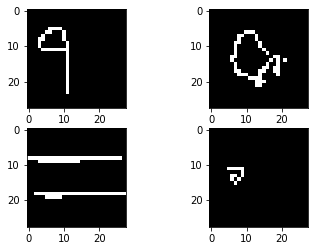

In [ ]:
plt.subplot(221)
plt.imshow(X_train_all[1000], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train_all[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train_all[159999], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train_all[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
X_test_a=get_data(paths_test_a,resize_dim=RESIZE_DIM)
X_test_b=get_data(paths_test_b,resize_dim=RESIZE_DIM)
X_test_c=get_data(paths_test_c,resize_dim=RESIZE_DIM)
X_test_d=get_data(paths_test_d,resize_dim=RESIZE_DIM)
X_test_e=get_data(paths_test_e,resize_dim=RESIZE_DIM)
X_test_f=get_data(paths_test_f,resize_dim=RESIZE_DIM)
X_test_auga=get_data(paths_test_auga,resize_dim=RESIZE_DIM)
X_test_augc=get_data(paths_test_augc,resize_dim=RESIZE_DIM)

processed 3489/3489
processed 69/69
processed 4381/4381
processed 1948/1948
processed 2970/2970
processed 495/495
processed 2168/2168
processed 2106/2106


In [ ]:
X_test_all=np.concatenate((X_test_a,X_test_b,X_test_c,X_test_d,X_test_e,X_test_f,X_test_auga,X_test_augc))

In [ ]:
X_tshow_all=X_test_all
X_tshow_all.shape

(17626, 28, 28)

In [ ]:
X_train_all = X_train_all.reshape(X_train_all.shape[0],1, 28,28).astype('float32')
X_test_all = X_test_all.reshape(X_test_all.shape[0],1, 28,28).astype('float32')

In [ ]:
X_train_all.shape
print(X_train_all)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 ...


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. 

In [ ]:
X_train_all = X_train_all/255
X_test_all=X_test_all/255

In [ ]:
indices=list(range(len(X_train_all)))
np.random.seed(42)
np.random.shuffle(indices)

ind=int(len(indices)*0.80)
# train data
X_train=X_train_all[indices[:ind]] 
y_train=y_train_all[indices[:ind]]
# validation data
X_val=X_train_all[indices[-(len(indices)-ind):]] 
y_val=y_train_all[indices[-(len(indices)-ind):]]

In [ ]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## CNN

In [ ]:
def my_model(img_size=28,channels=1):
    model = Sequential()
    input_shape = (channels,img_size,img_size)
    model.add(Conv2D(28, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(28, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
    
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(20))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    #model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    #model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam',)
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        728       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        19628     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 14, 14)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 14, 14)       32384     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 14, 14)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 7, 7)        0         
 2D)                                                    

In [ ]:
path_model='model_filter.h5' # save model at this location after each epoch
#K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=10, 
            verbose=1, 
            validation_data=(X_val,y_val),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/10
2568/2568 [==============================] - 42s 12ms/step - loss: 0.2235 - accuracy: 0.9350 - val_loss: 0.0664 - val_accuracy: 0.9817
Epoch 2/10
2568/2568 [==============================] - 32s 12ms/step - loss: 0.0670 - accuracy: 0.9822 - val_loss: 0.0514 - val_accuracy: 0.9866
Epoch 3/10
2568/2568 [==============================] - 30s 12ms/step - loss: 0.0480 - accuracy: 0.9875 - val_loss: 0.0517 - val_accuracy: 0.9869
Epoch 4/10
2568/2568 [==============================] - 32s 12ms/step - loss: 0.0383 - accuracy: 0.9895 - val_loss: 0.0508 - val_accuracy: 0.9865
Epoch 5/10
2568/2568 [==============================] - 32s 12ms/step - loss: 0.0314 - accuracy: 0.9914 - val_loss: 0.0544 - val_accuracy: 0.9892
Epoch 6/10
2568/2568 [==============================] - 30s 12ms/step - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.0442 - val_accuracy: 0.9901
Epoch 7/10
2568/2568 [==============================] - 32s 12ms/step - loss: 0.0259 - accuracy: 0.9930 - val_loss: 0.0501 -

# Model with resnet18

In [1]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf


class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out



In [2]:
model = ResNet18(20)
model.build(input_shape = (None,1,28,28))
#use categorical_crossentropy since the label is one-hot encoded
from keras.optimizers import SGD
# opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) #parameters suggested by He [1]
model.compile(optimizer = "adam",loss='categorical_crossentropy', metrics=["accuracy"]) 
model.summary()

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "res_net18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  87872     
                                                                 
 batch_normalization (BatchN  multiple                 256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 resnet_block (ResnetBlock)  multiple                  74368     
                                                                 
 resnet_block_1 (ResnetBlock  multiple              

In [ ]:
checkpoint_path = "weights_ekushey_no_5_6-{epoch:03d}.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,
   # Save weights, every epoch.
   save_freq='epoch')

In [ ]:
path_model='model_filter.h5' # save model at this location after each epoch
#K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=model # create the model
#K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=125, 
            verbose=1, 
            validation_data=(X_val,y_val),
            shuffle=True,
            callbacks=[cp_callback]
           
            )

Epoch 1/125
2567/2568 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9989
Epoch 1: saving model to weights_ekushey_no_5_6-001.h5
2568/2568 [==============================] - 62s 24ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.1196 - val_accuracy: 0.9806
Epoch 2/125
2567/2568 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9989
Epoch 2: saving model to weights_ekushey_no_5_6-002.h5
2568/2568 [==============================] - 61s 24ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.1217 - val_accuracy: 0.9811
Epoch 3/125
2568/2568 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9988
Epoch 3: saving model to weights_ekushey_no_5_6-003.h5
2568/2568 [==============================] - 61s 24ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.1268 - val_accuracy: 0.9820
Epoch 4/125
2567/2568 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9989
Epoch 4: saving model to weights_e

In [ ]:
predictions_prob=model.predict(X_test_all)

551/551 [==============================] - 2s 4ms/step


In [ ]:
n_sample=500
np.random.seed(42)
ind=np.random.randint(0,len(X_test_all), size=n_sample)

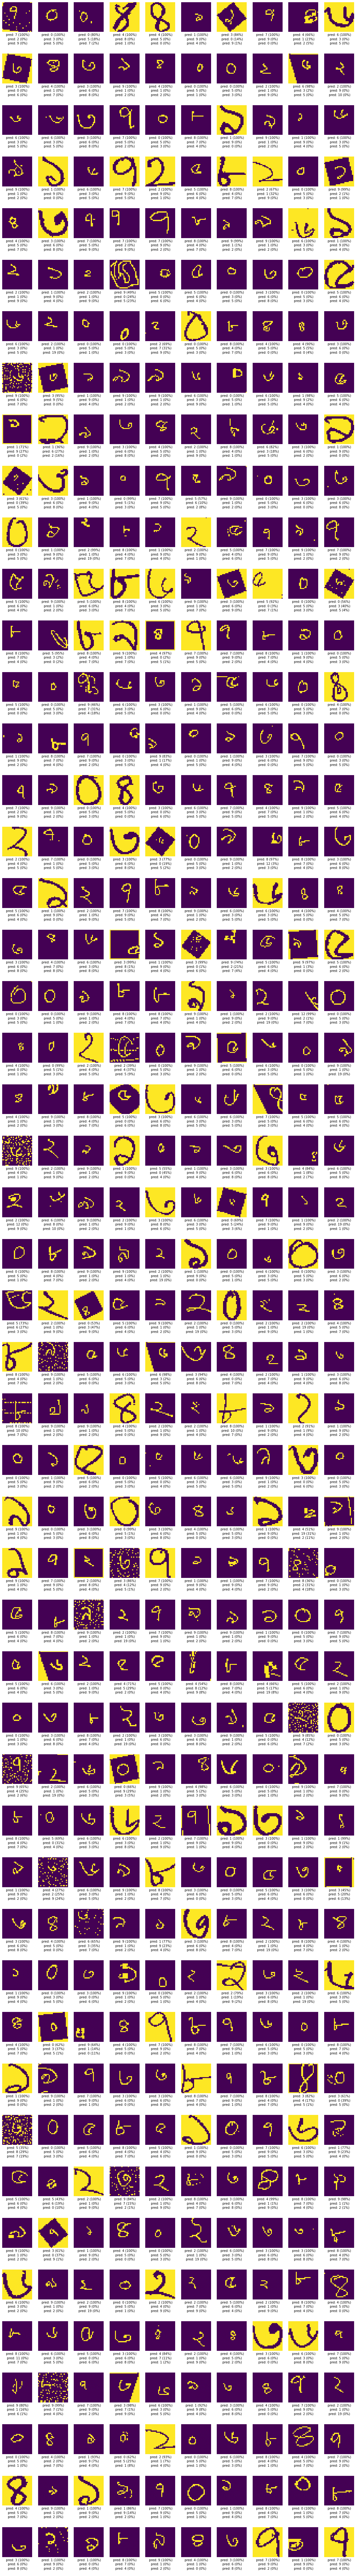

In [ ]:
imshow_group(X=X_tshow_all[ind],y=None,y_pred=predictions_prob[ind], phase='prediction')